In [7]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt

def ExtractData( path = "/Users/ambarjin/Desktop/Y4 Data Sci/Dissertation/Tracking/PersistanceProject/E1339_20211007-10uMCCCP-1h"):
    csv_files = []
    for file in os.listdir(path):
        if file.endswith('.csv'):
            csv_files.append(path+'/'+file)
    nof_files = len(csv_files)
    
    # Extract information from all csv files in csv_files
    time_scale = []
    areas = []
    means = []
    time_steps = []
    data_size = []
    for csv_name in csv_files:
        loc_time_scale = [] 
        loc_areas = []
        loc_means = []
        # Read csv file
        with open(csv_name, newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            iLine = 0
            for row in reader:
                if iLine > 0:
                    loc_time_scale.append(row[2])
                    loc_areas.append([float(item) for item in row[3::2]])
                    loc_means.append([float(item) for item in row[4::2]])
                iLine += 1
        time_scale = np.array(loc_time_scale)
        np_loc_areas = np.array(loc_areas)
        areas.append(np_loc_areas)
        means.append(np.array(loc_means))
        time_steps.append(np_loc_areas.shape[0])
        data_size.append(np_loc_areas.shape[1])                 
    
    return data_size,time_steps,means,nof_files,areas

In [40]:
def LeadLag(path,lag =1):
    path = np.repeat(path, lag+1)
    lead = np.copy(path)
    lead = lead[1:]
    lag = np.copy(path)
    lag = lag[:-1]
    
    path = np.vstack((lead,lag)).T
    return(path)

In [92]:
import iisignature 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#When Signature Level = 0 means that signatures will not be used
def Train(SignatureLevel= 0,testSize = 0.2):
    data_size,time_steps,means,nof_files,areas= ExtractData()
    Data =[]
    labels=[]
    for i_file in range(nof_files):
        # plt.figure()
        for i in range(data_size[i_file]):
            
            if(SignatureLevel>0):
                time = np.arange(0,len(means[i_file]), 1, dtype=int)
                path=np.copy(means[i_file][:,i])
                path = LeadLag(path, lag=1)
                signature = iisignature.sig(path ,SignatureLevel)
                Data.append(signature)
            elif(SignatureLevel == 0):  
                Data.append(np.array(means[i_file][:,i]))
            else:
                Data.append(np.array(means[i_file][:,i])-np.array(means[i_file][0,i]))
                
                

            labels.append(i_file)

    Data = np.array(Data)
    accuracy =[]
    for i in range(1,11):
        X_train, X_test, y_train, y_test = train_test_split(Data, labels, test_size=testSize)
        clf = RandomForestClassifier(n_estimators=1,max_depth=3, random_state=42)   # You can choose a different classifier
        #clf = LogisticRegression(max_iter=8000)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy.append( accuracy_score(y_test, y_pred))
    if(SignatureLevel == -1):
        first_tree = clf.estimators_[0]

        # Visualize the decision tree
        plt.figure(figsize=(50, 40))
        plot_tree(first_tree)
        plt.show()
        
    report = classification_report(y_test, y_pred)
    #print(report)

    return np.mean(accuracy)
   

        

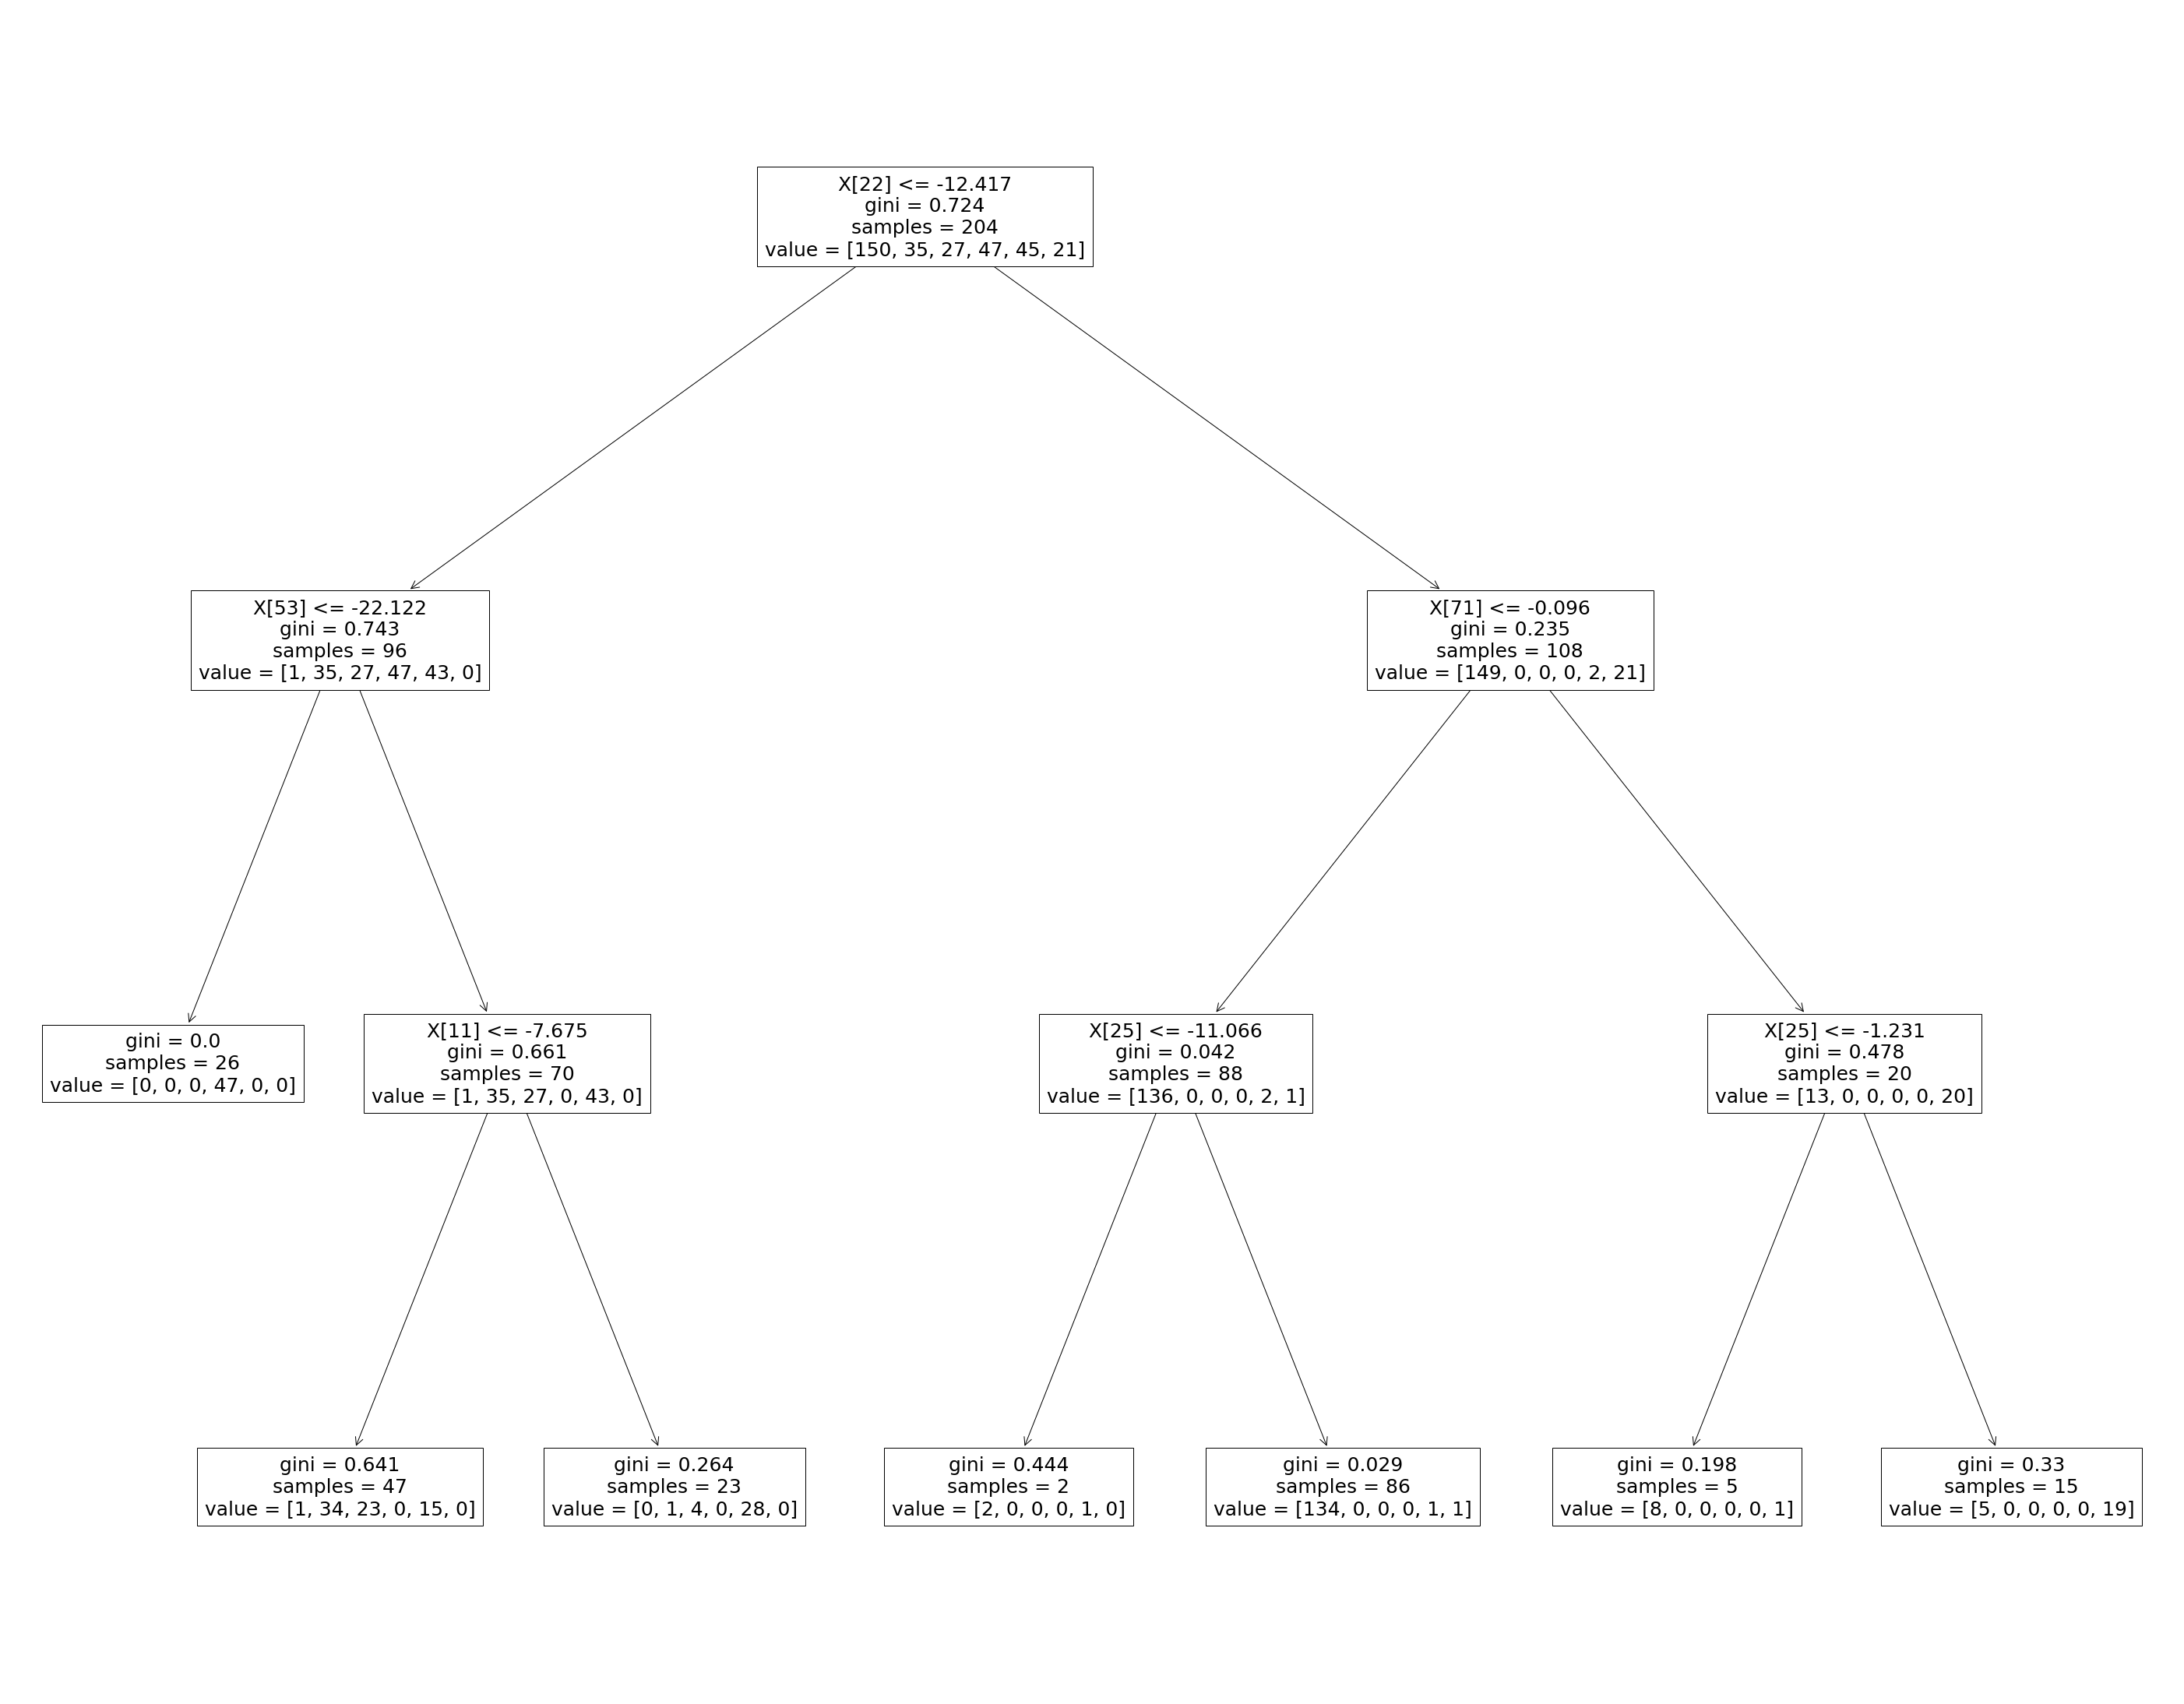

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

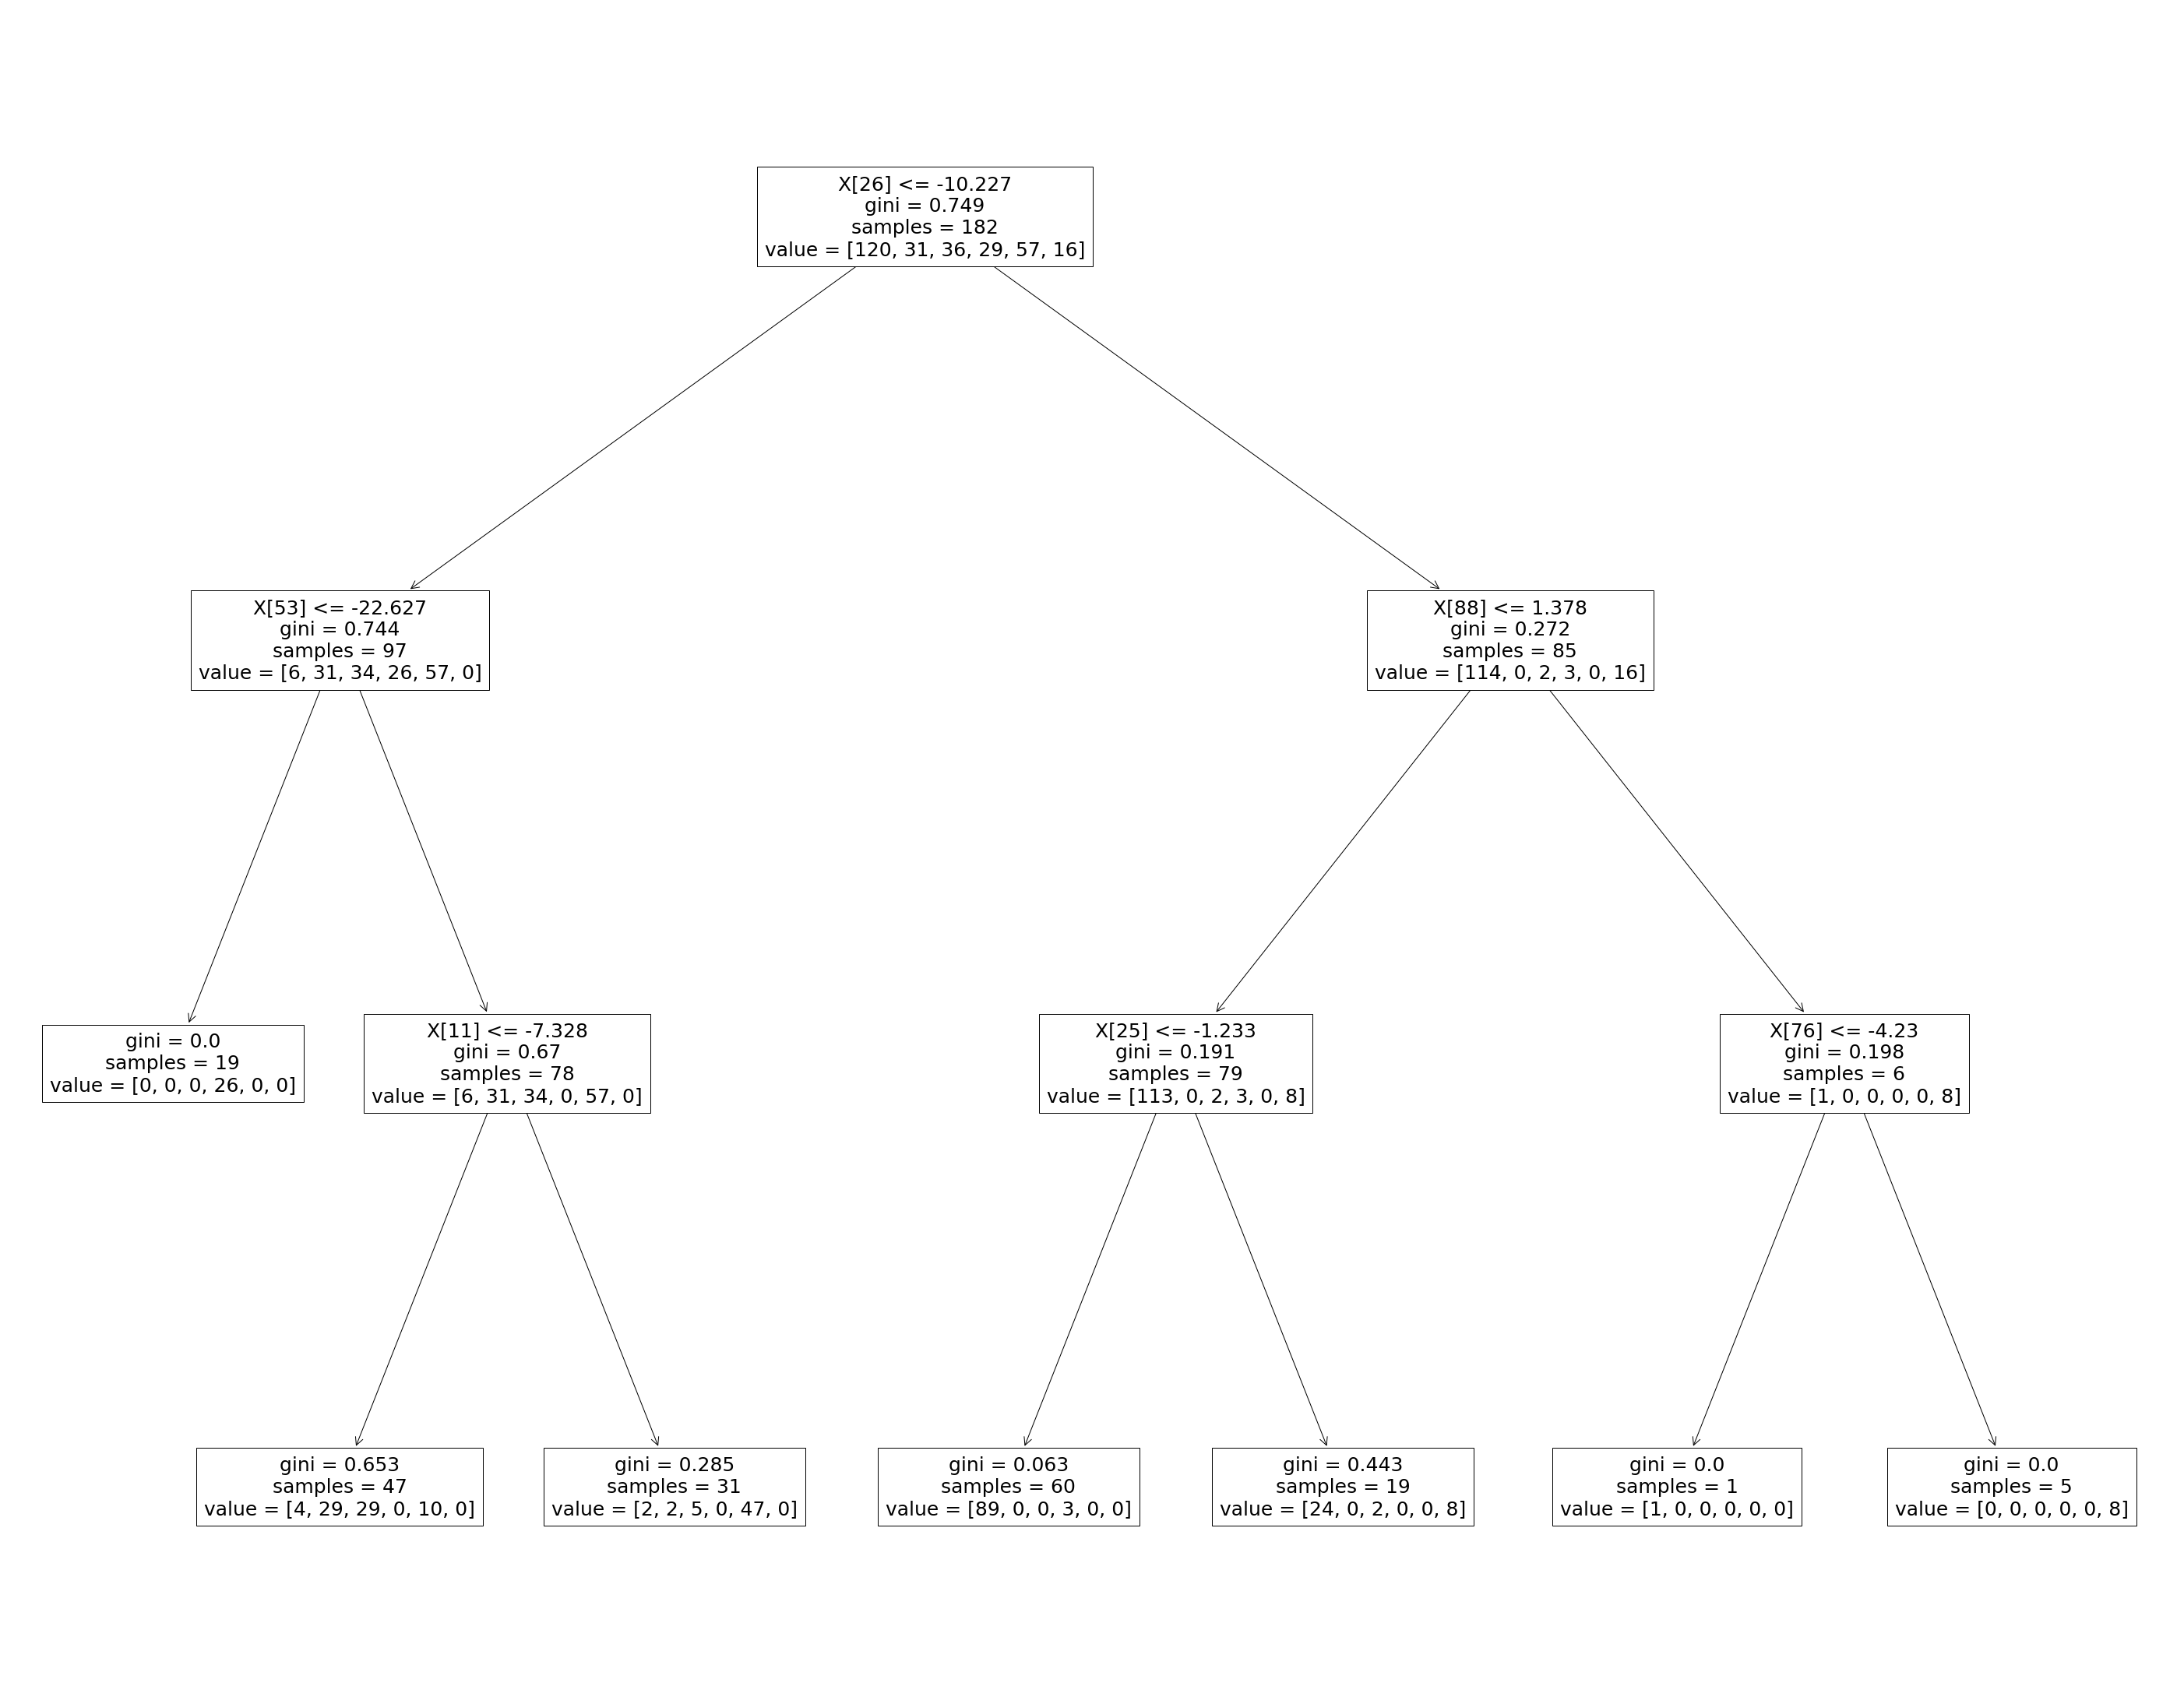

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

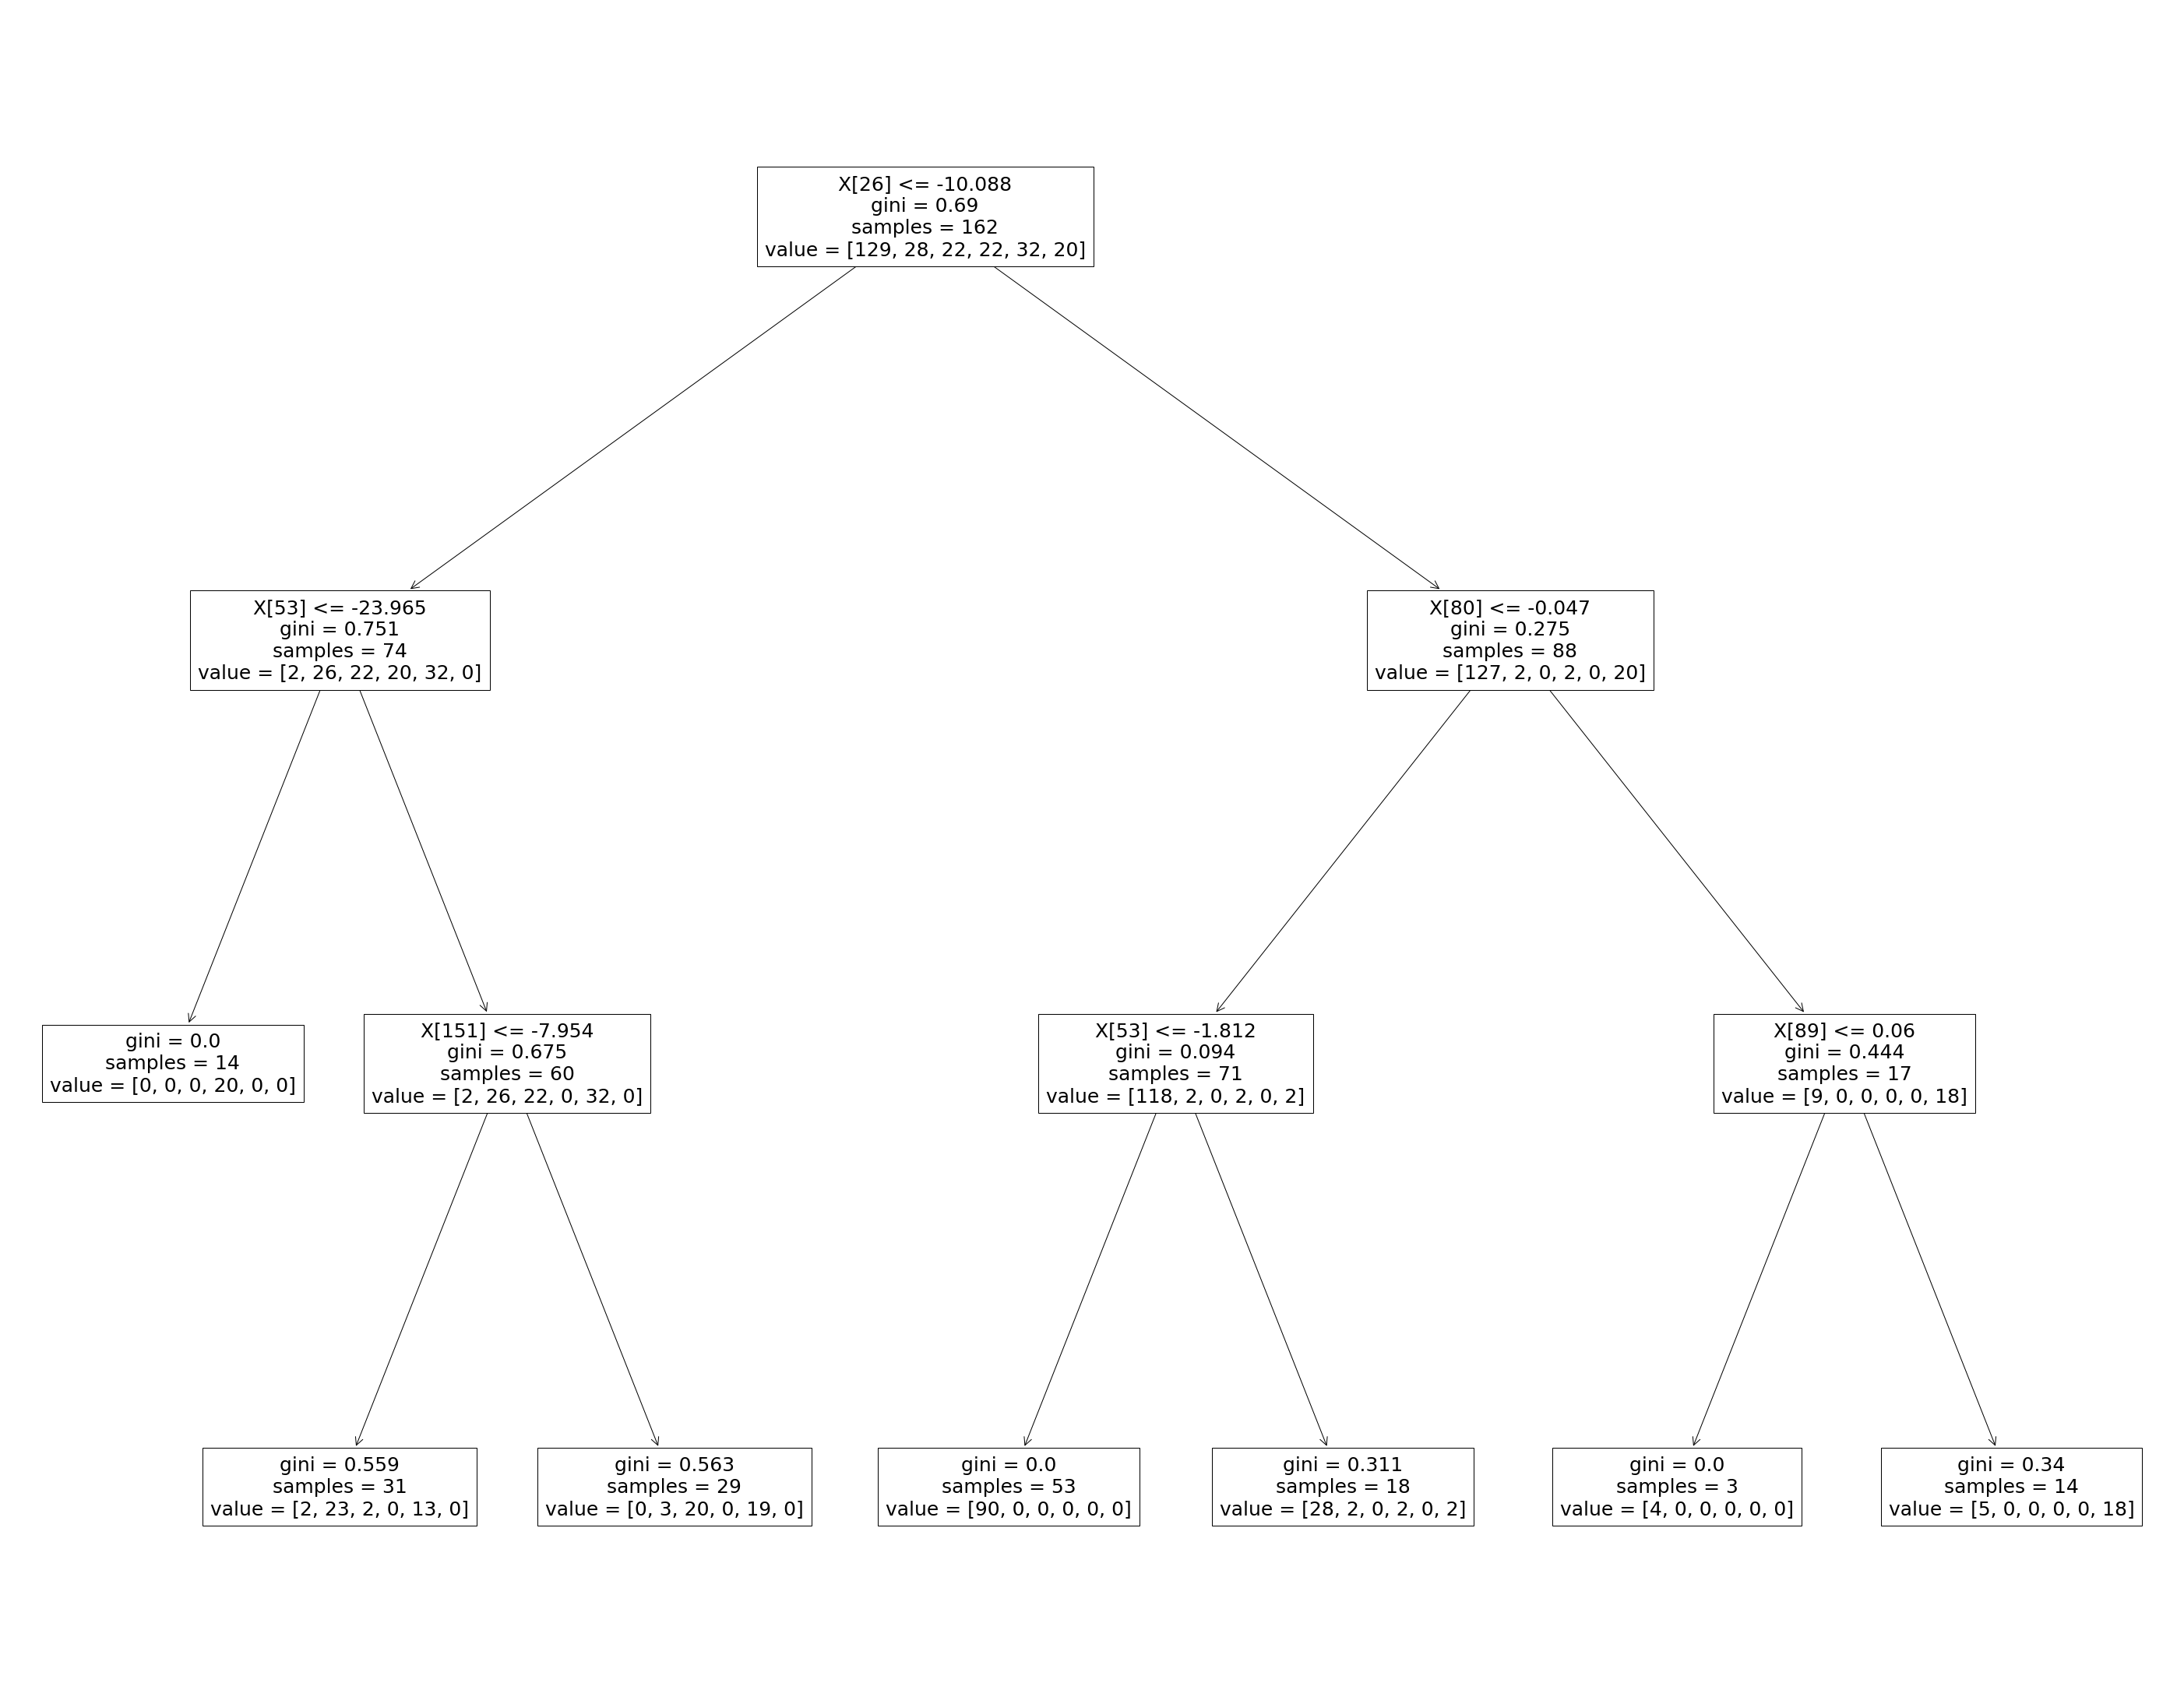

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

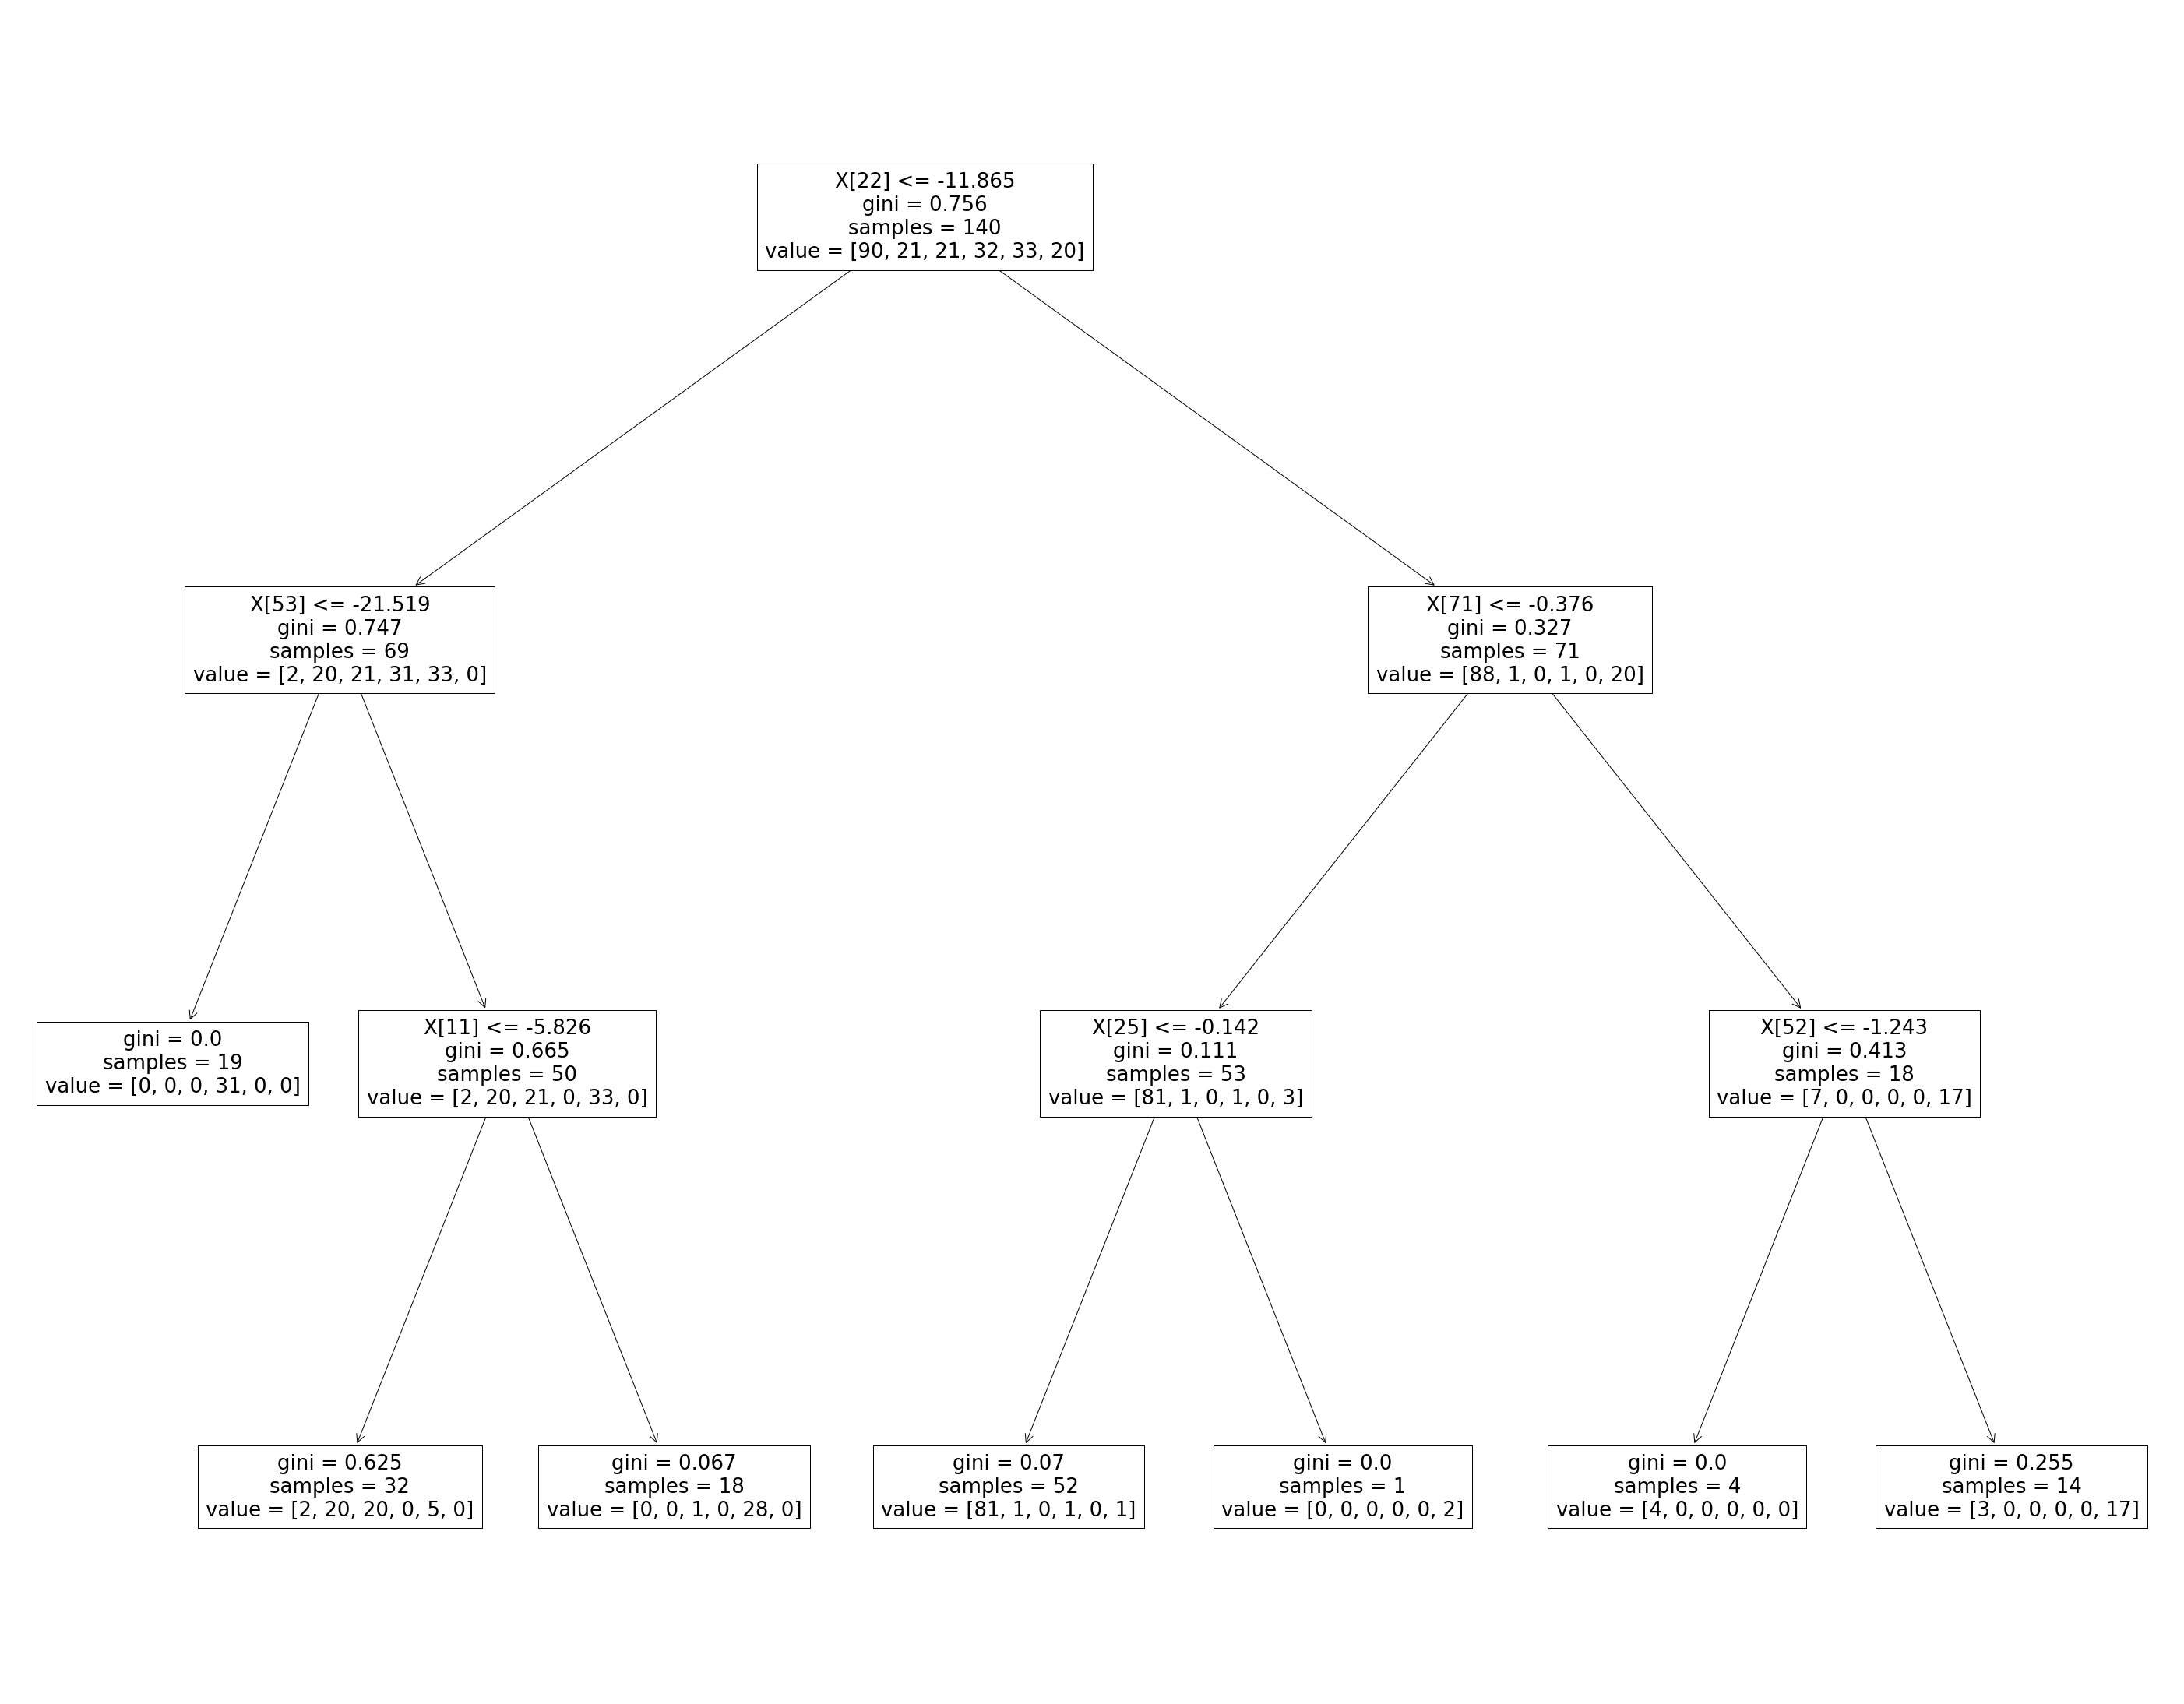

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

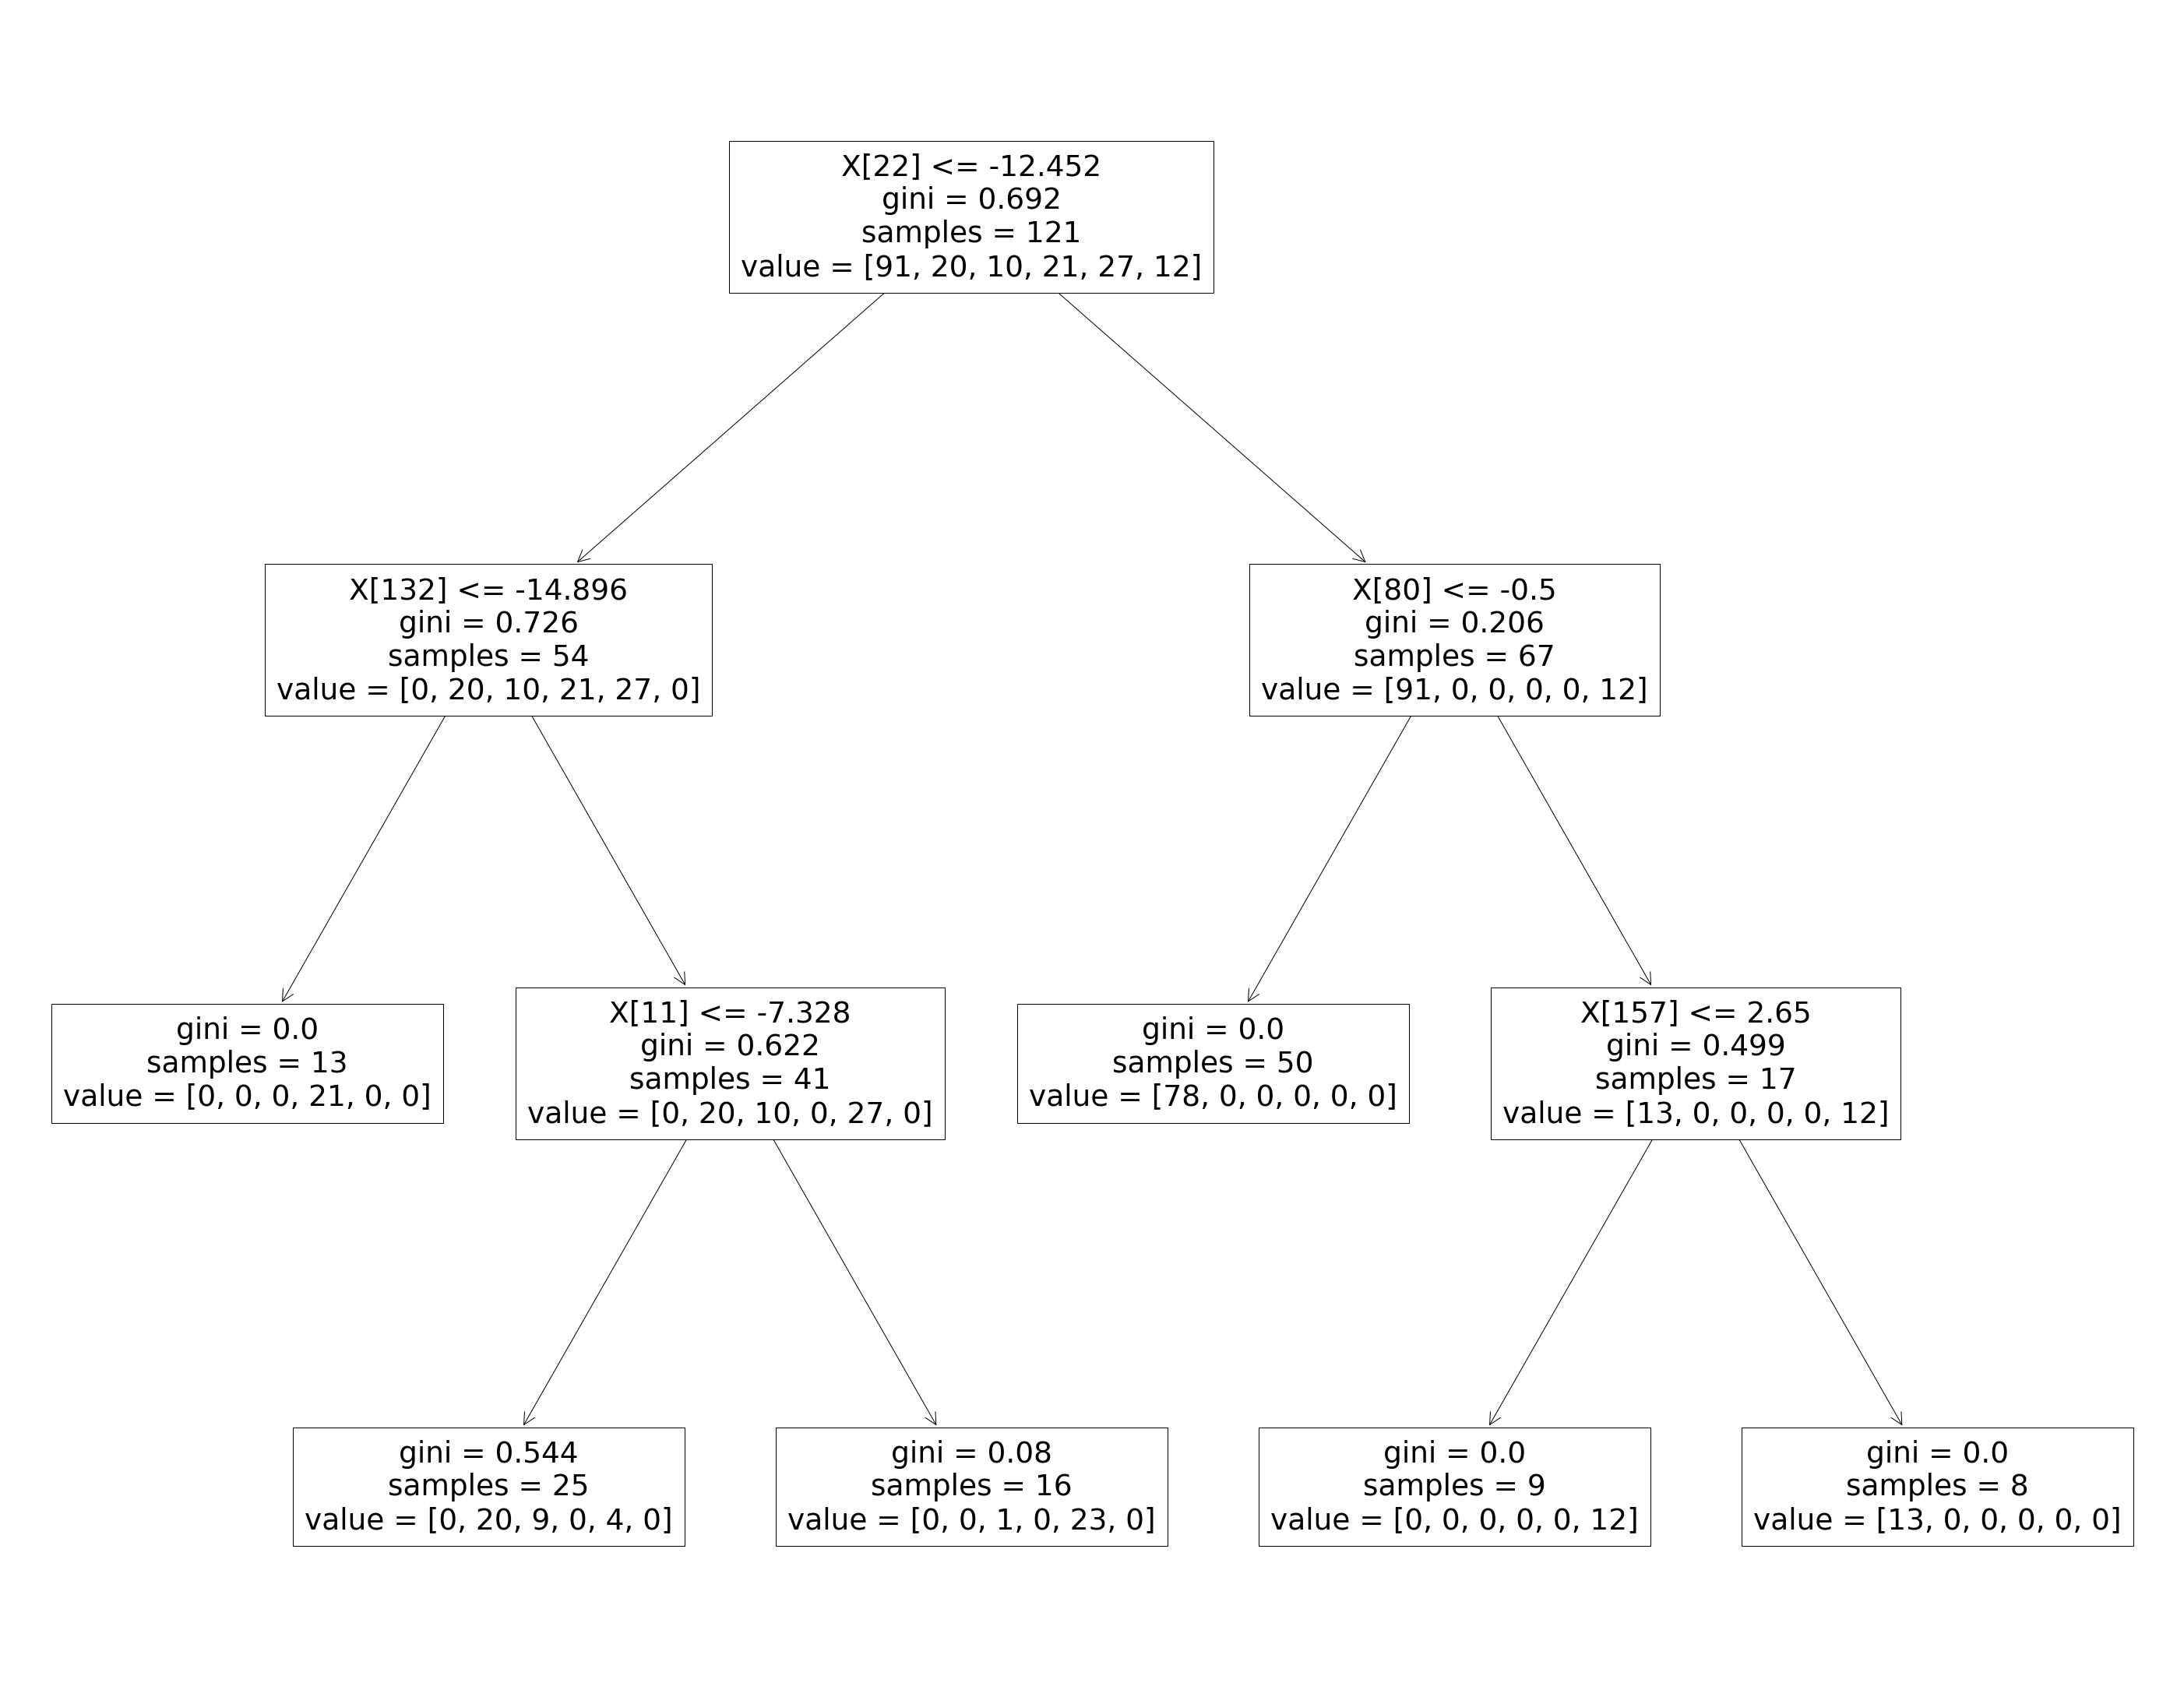

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

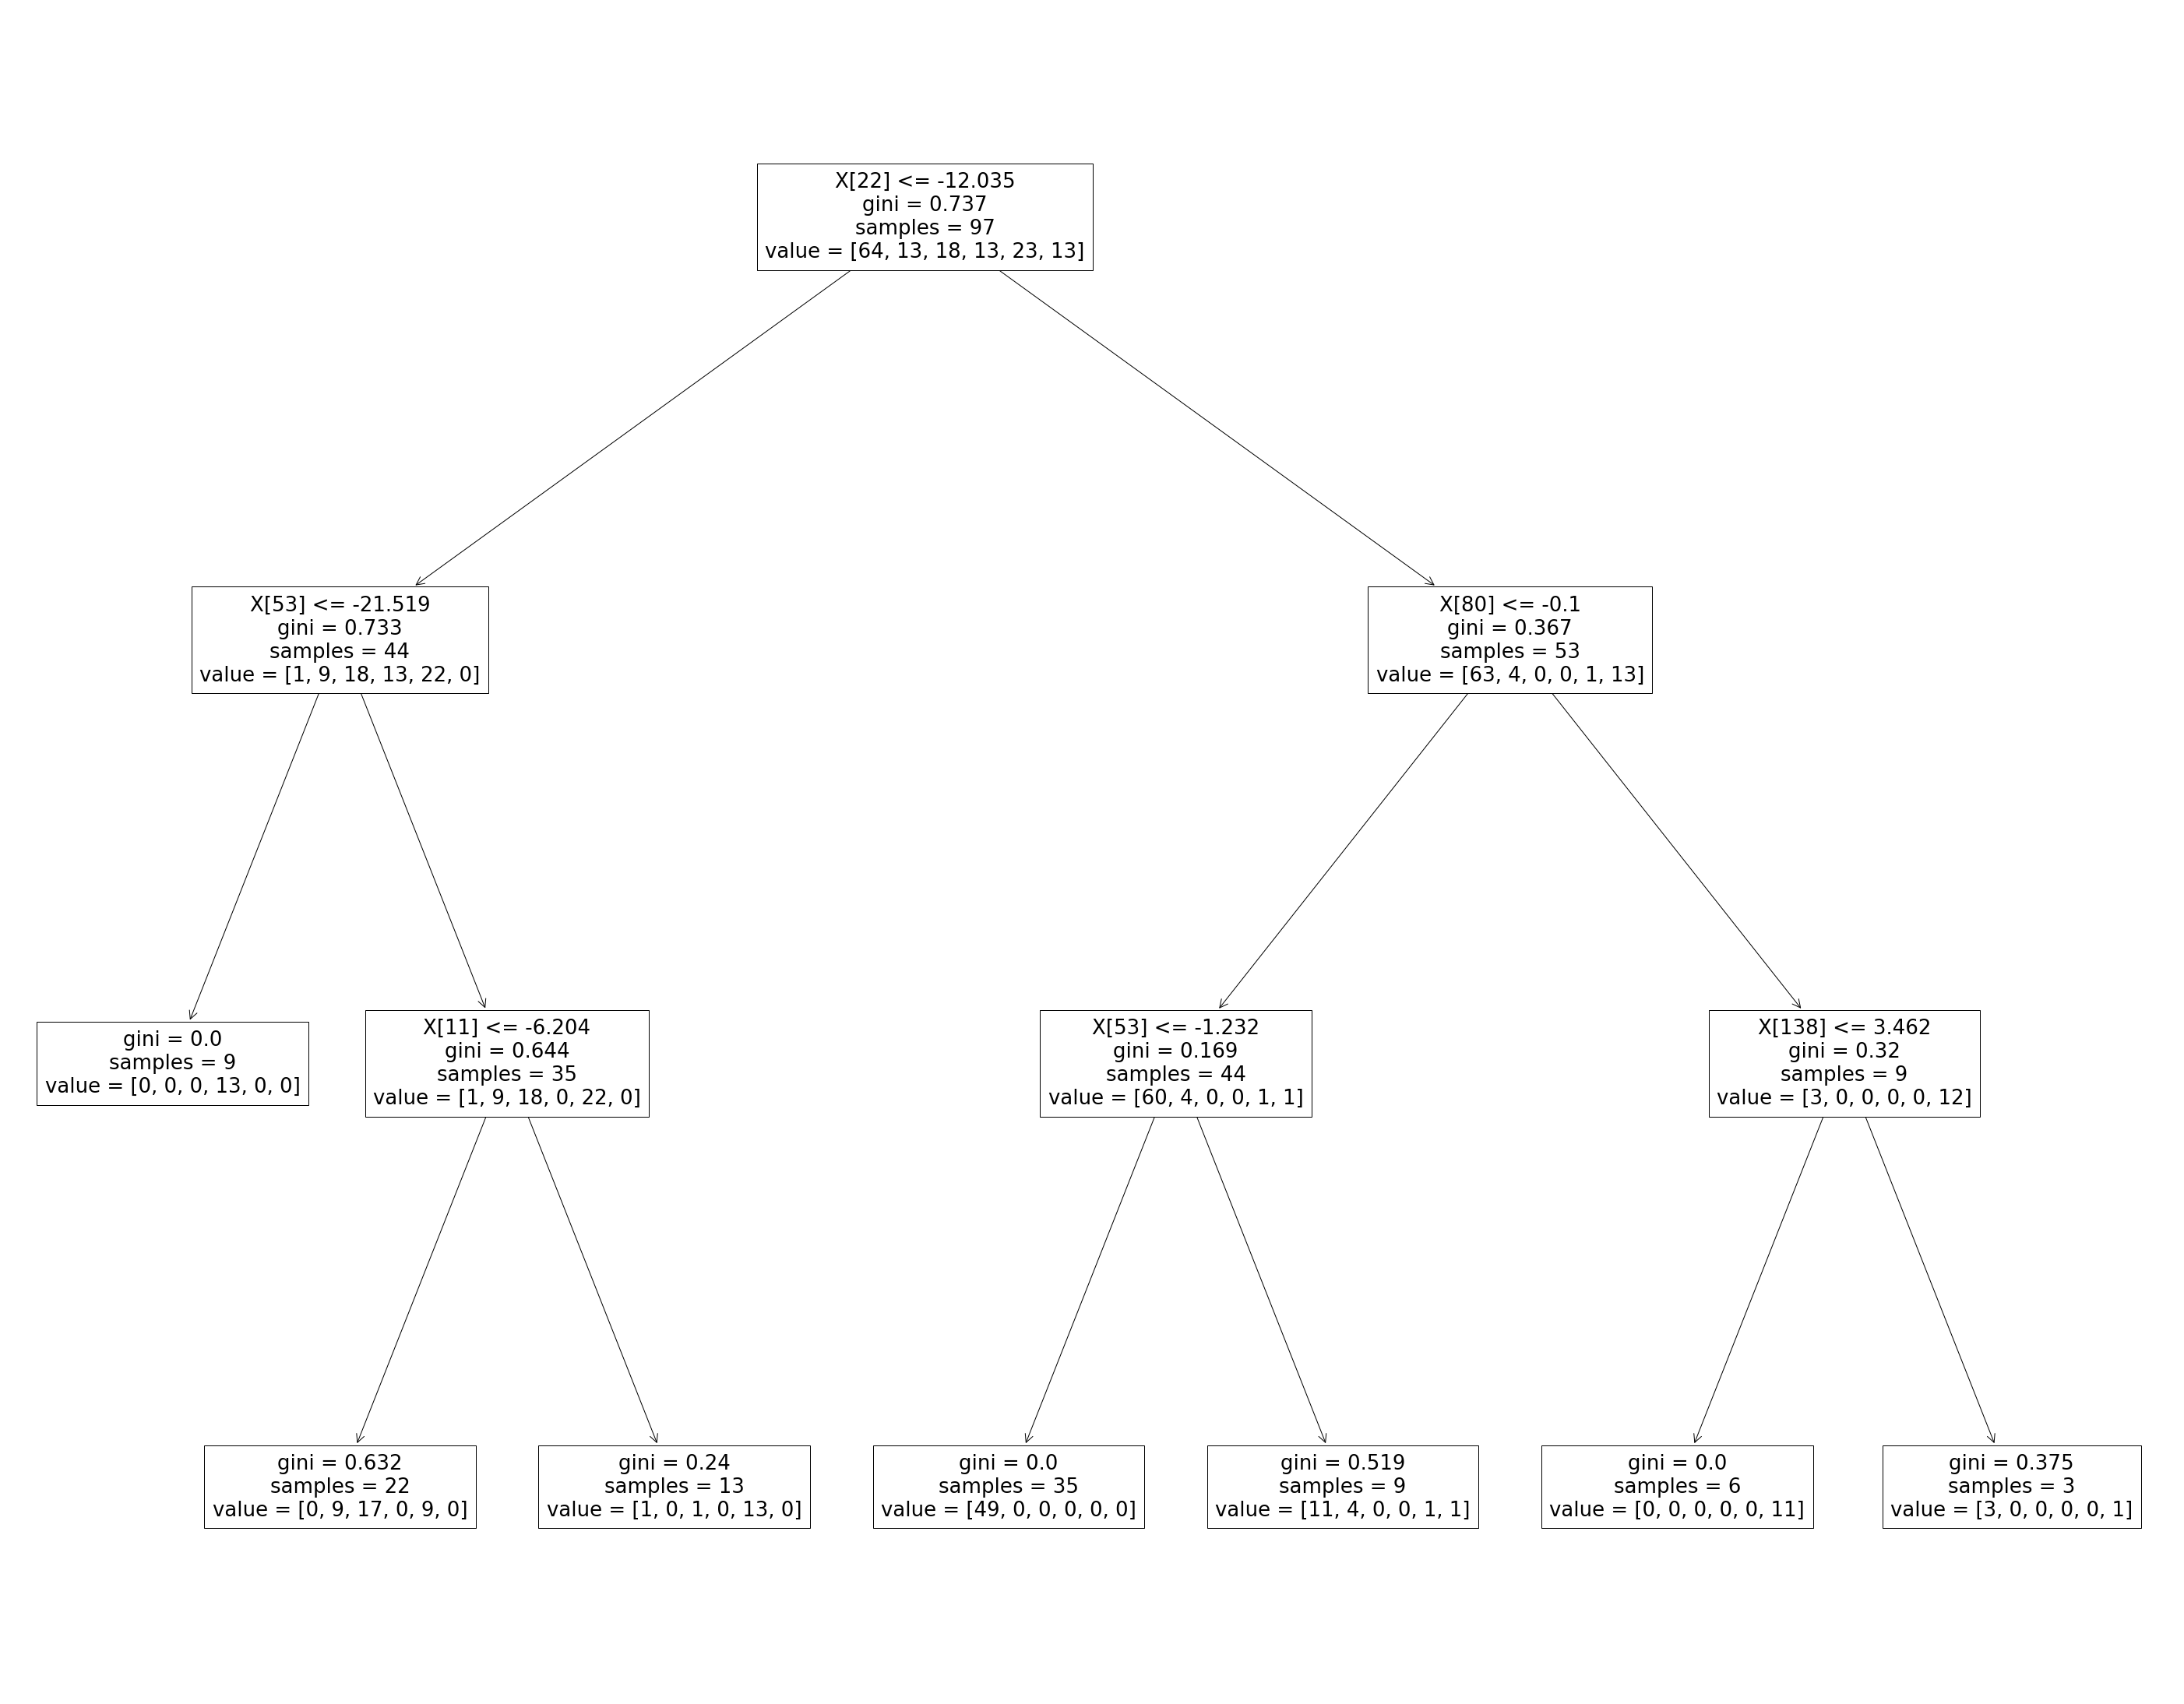

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

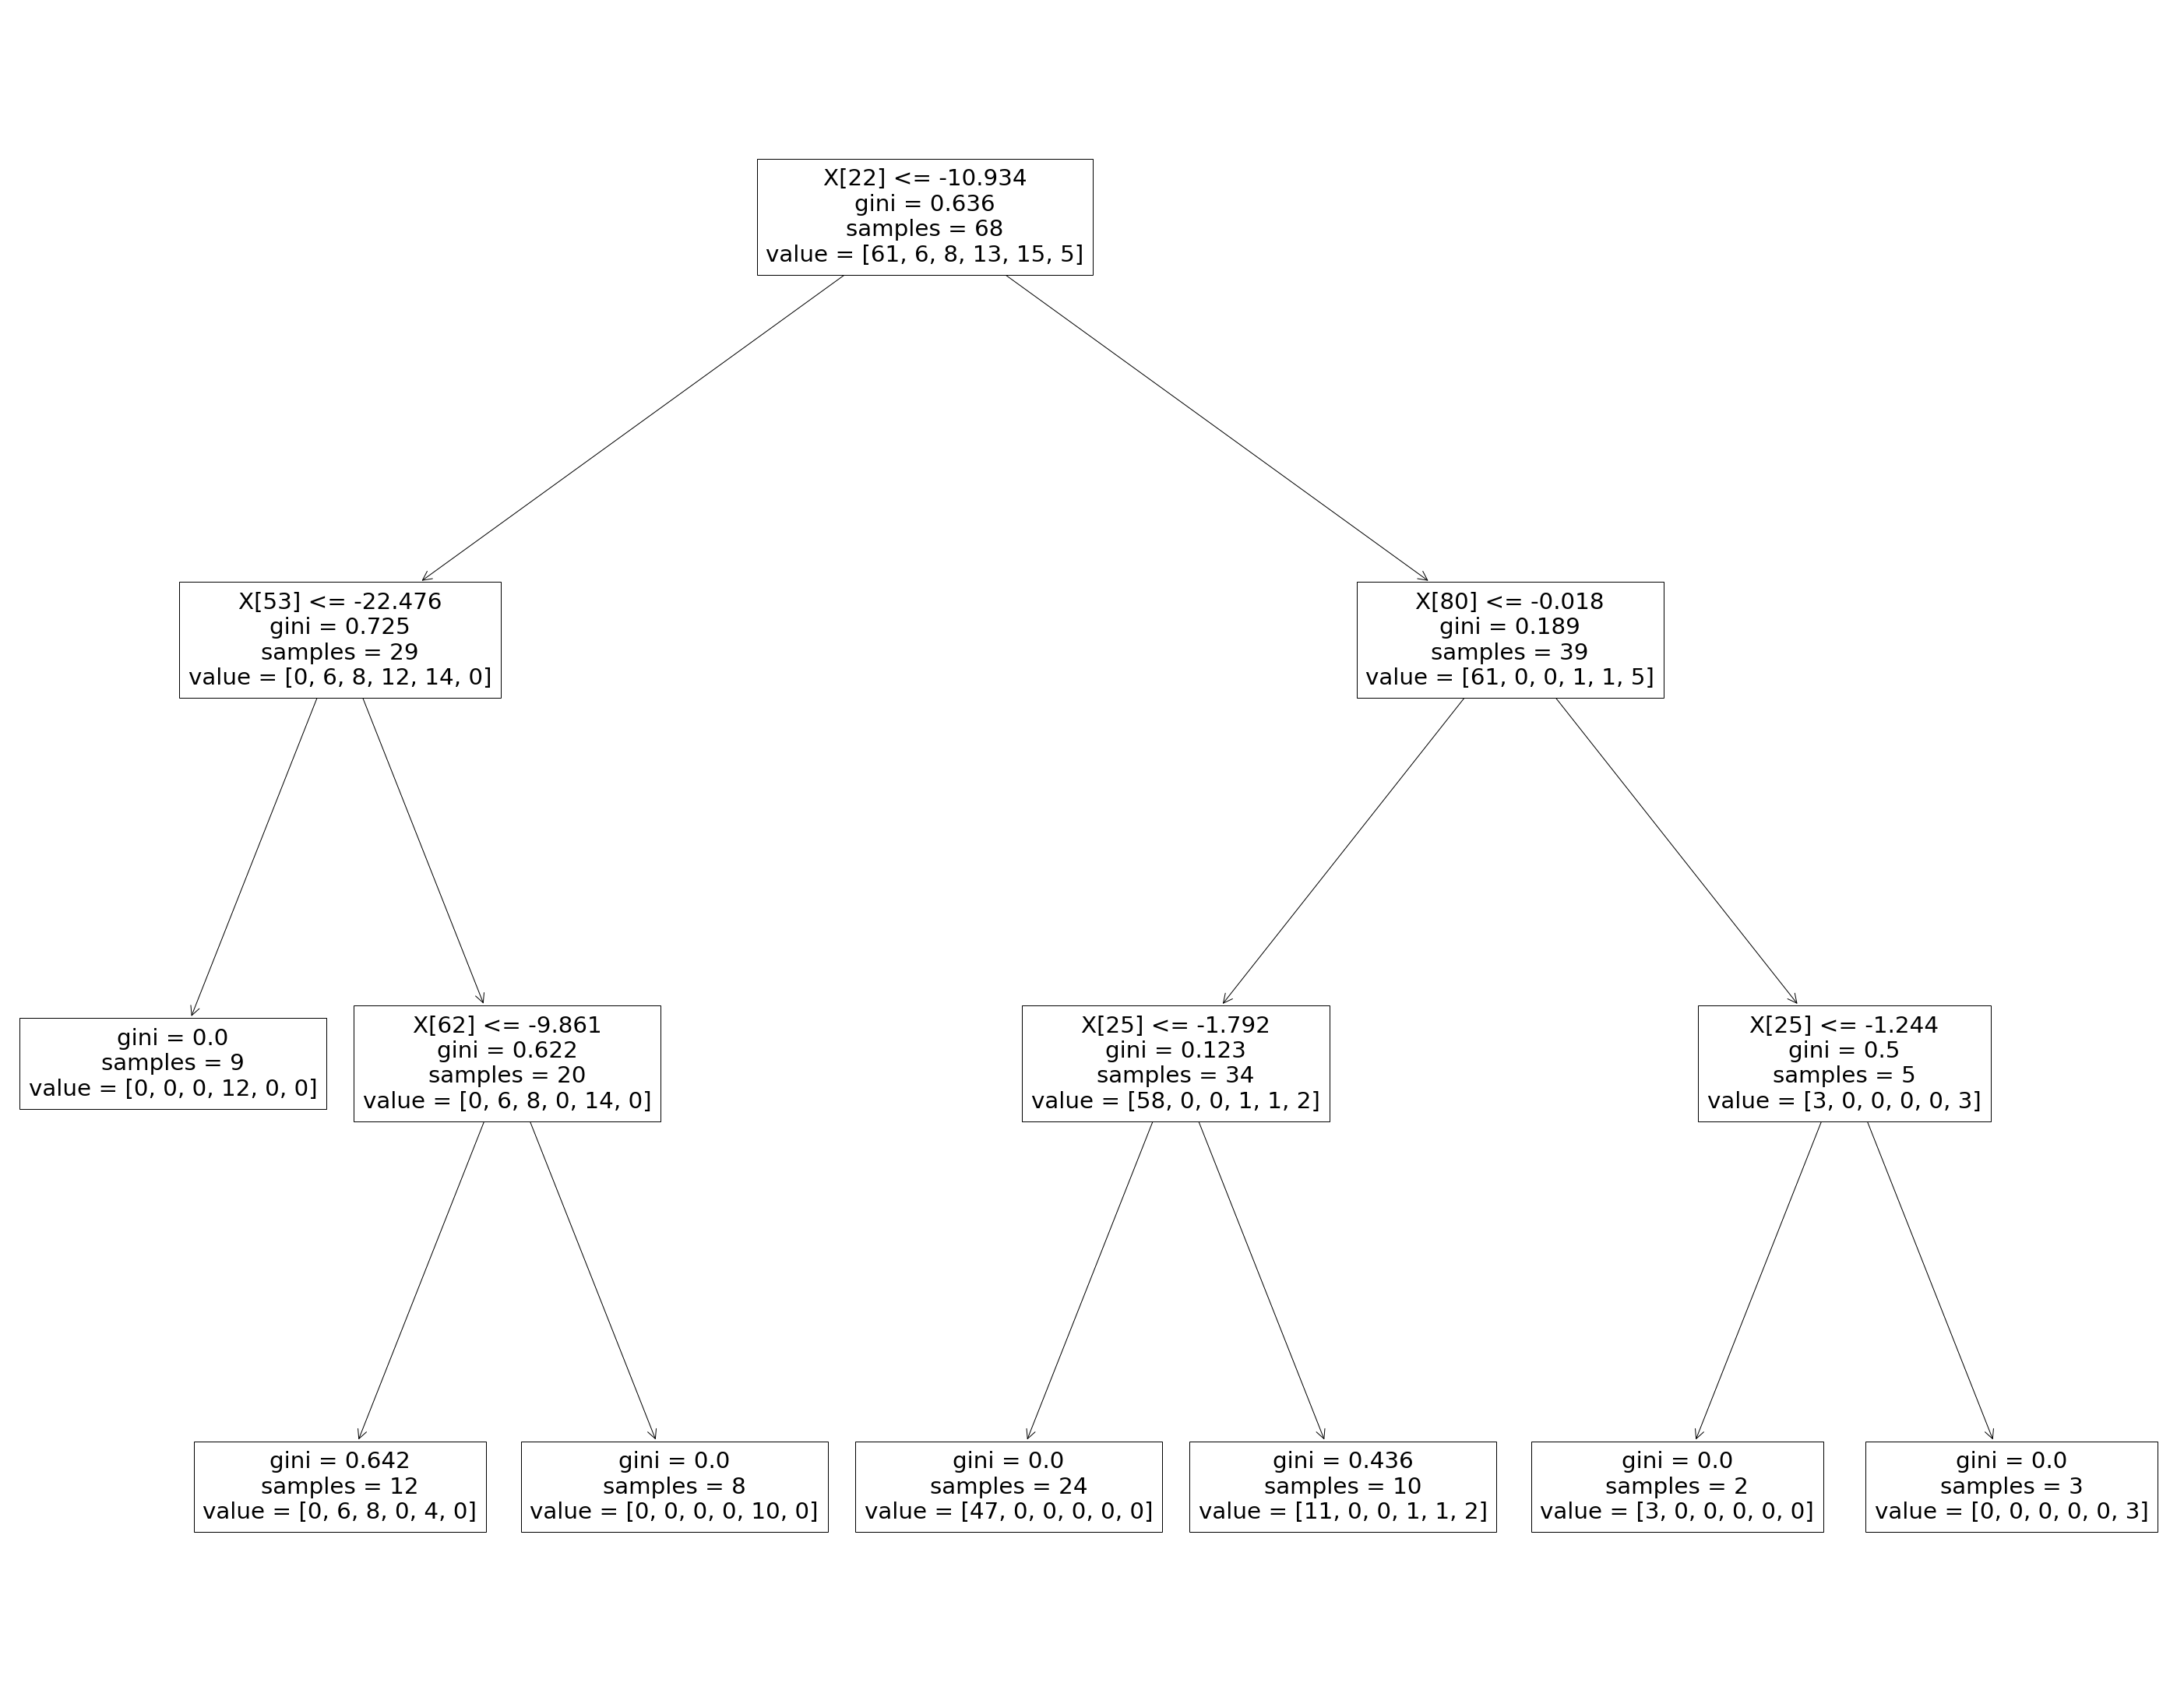

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [93]:
label = []
testSize =[]
accuracy =[]

for p in [-1,0,1,2,3,4,5,6,7]:
    for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
        label.append(p)
        testSize.append(i)
        accuracy.append(Train(SignatureLevel=p,testSize=i))
        

for i in range(len(accuracy)):
    accuracy[i]=(accuracy[i] * 100)
for i in range(len(testSize)):
    testSize[i]=(testSize[i] * 100)
    


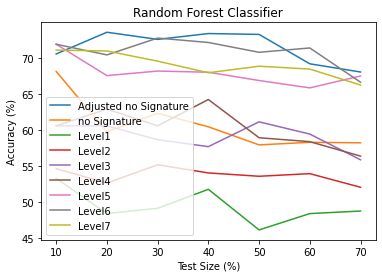

In [94]:
for t in [-1,0,1,2,3,4,5,6,7]:
    p = [index for index, value in enumerate(label) if value == t]
    if(t==0):
        plt.plot([ testSize[i] for i in p],[ accuracy[i] for i in p], label = "no Signature") 
    elif(t==-1):
        plt.plot([ testSize[i] for i in p],[ accuracy[i] for i in p], label = "Adjusted no Signature") 
    else:
        plt.plot([ testSize[i] for i in p],[ accuracy[i] for i in p], label = 'Level'+str(t)) 
    

plt.title("Random Forest Classifier")
plt.ylabel("Accuracy (%)")
plt.xlabel("Test Size (%)")
plt.legend() 
plt.show()

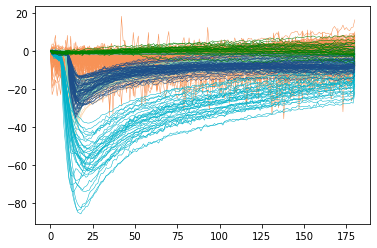

In [96]:
import iisignature 

data_size,time_steps,means,nof_files,areas= ExtractData()
color_list = ['#F79256', '#FBD1A2', '#7DCFB6', '#00B2CA', '#1D4E89',"green"]
Signatures =[]

for i_file in range(nof_files):
    # plt.figure()
    for i in range(data_size[i_file]):
        path = np.array(means[i_file][:,i] - means[i_file][0,i])
        plt.plot(means[i_file][:,i] - means[i_file][0,i], linewidth=0.5, color=color_list[i_file]) 

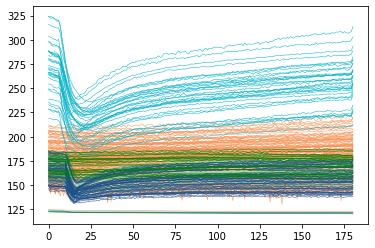

In [4]:
import iisignature 

data_size,time_steps,means,nof_files,areas= ExtractData()
color_list = ['#F79256', '#FBD1A2', '#7DCFB6', '#00B2CA', '#1D4E89',"green"]
Signatures =[]

for i_file in range(nof_files):
    # plt.figure()
    for i in range(data_size[i_file]):
        plt.plot(means[i_file][:,i], linewidth=0.5, color=color_list[i_file]) 